In [8]:
#%%
"""
Created on Thu Nov 27 2018
Integrated Brownian motion- three cases, W(t), and I(t)
@author: Lech A. Grzelak
"""
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def ComputeIntegrals(NoOfPaths,NoOfSteps,T):
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    W = np.zeros([NoOfPaths, NoOfSteps+1])
    I1 = np.zeros([NoOfPaths, NoOfSteps+1])
    I2 = np.zeros([NoOfPaths, NoOfSteps+1])
    time = np.zeros([NoOfSteps+1])

    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
        W[:,i+1] = W[:,i] + np.power(dt, 0.5)*Z[:,i]
        I1[:,i+1] = I1[:,i] + W[:,i]*dt
        I2[:,i+1] = I2[:,i] + W[:,i]*(W[:,i+1]-W[:,i])
        time[i+1] = time[i] +dt

    paths = {"time":time,"W":W,"I1":I1,"I2":I2}
    return paths


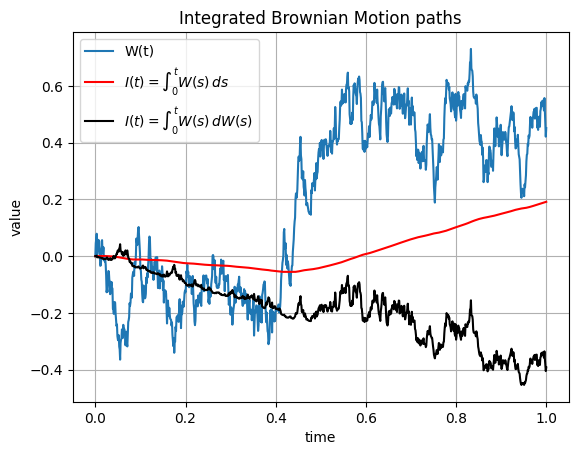

In [10]:
NoOfPaths = 1
NoOfSteps = 1000
T = 1

W_t = ComputeIntegrals(NoOfPaths,NoOfSteps,1)
timeGrid = W_t["time"]
Ws = W_t["W"]
intWsds = W_t["I1"]
intWsdWs = W_t["I2"]

plt.figure(1)
plt.plot(timeGrid, np.transpose(Ws), label="W(t)")
plt.plot(timeGrid, np.transpose(intWsds),'r', label = r"$I(t) = \int_{0}^{t} W(s) \,ds$")
plt.plot(timeGrid, np.transpose(intWsdWs),'k', label = r"$I(t) = \int_{0}^{t} W(s) \,dW(s)$")
plt.grid()
plt.xlabel("time")
plt.ylabel("value")
plt.title("Integrated Brownian Motion paths")
plt.legend()